In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import win32file
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl
import xarray as xr
import boutdata

from boutdata.restart import addvar
import glob
import shutil

import scipy

sys.path.append(r"C:\Users\mikek\OneDrive\Project\python-packages\sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from cli.cmonitor import *
# from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# IO

In [6]:
db = CaseDB(
    # case_dir = r"/ssd_scratch/hcases",
    # grid_dir = r"/ssd_scratch/hcases"
    )

toload = [ 
    
    dict(name="base", id="d42a-d40db_mfp1_braginskiifix_newmaster", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="mxorder_off_rtol_1e-8", id="d43a-d40db_afn_neutral_limiters", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="mxorder_off_rtol_1e-7", id="t1c-mxorder_off_rtol_1e-7", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="mxorder_off_rtol_1e-6", id="t1d-mxorder_off_rtol_1e-6", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="mxorder_off_rtol_1e-5", id="t1e-mxorder_off_rtol_1e-5", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="mxorder_off_rtol_1e-4", id="t1f-mxorder_off_rtol_1e-4", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="quicktest_1e-5", id="t3a-rtol_1e-5_quicktest", unnormalise_geom = True, use_xhermes = True, squash = True), 
    
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)


- Reading case d42a-d40db_mfp1_braginskiifix_newmaster
-----------------------
- Looking for squash file
- Squash file found. squash date 08/13/2024, 11:01:17, dmp file date 08/13/2024, 10:19:23

Unnormalising with xHermes
- Reading case d43a-d40db_afn_neutral_limiters
-----------------------
- Looking for squash file
- Squash file found. squash date 08/13/2024, 16:00:07, dmp file date 08/13/2024, 15:04:47

Unnormalising with xHermes
- Reading case t1d-mxorder_off_rtol_1e-6
-----------------------
- Looking for squash file
- Squash file found. squash date 08/20/2024, 18:09:46, dmp file date 08/20/2024, 17:57:56


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes


In [3]:
from RMK_support import RKWrapper
import RMK_support.simple_containers as sc
import RMK_support.IO_support as io
import RMK_support.dashboard_support as ds
import pickle

# hdf5Filepath = "/ssd_scratch/compare_data/remkit" 
# wrapperPickleFilename = "/ssd_scratch/compare_data/remkit/RMK_hermes3-noneutral-nooutflow_1.pkl" # Replace with the name of the pkl file containing your wrapper

path = r"C:\Users\mikek\OneDrive\Project\Hermes-3_Remkit1D_DIV1D_comparison\From\Stefan\2024-08-14 - Pickle files with cases\RMK_hermes3-noneutral-nooutflow_2.pkl"

with open(path, "rb") as f:
    wrapper = pickle.load(f)    
# wrapper = pickle.load(open(r"C:\Users\mikek\OneDrive\Project\Hermes-3_Remkit1D_DIV1D_comparison\From\Stefan\2024-08-14 - Pickle files with cases\RMK_hermes3-noneutral-nooutflow_1.pkl","rb"))
# assert type(wrapper) == RKWrapper
# varsNotInOutput=list(wrapper.varCont.dataset.keys()-set(wrapper.varsInOutput()))

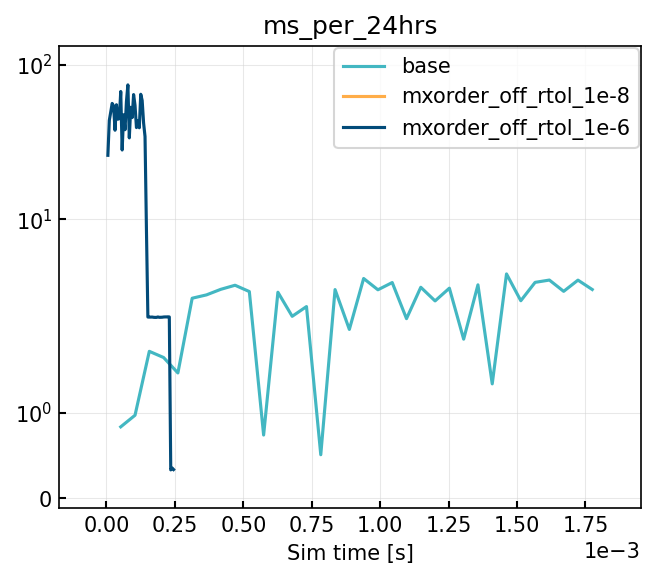

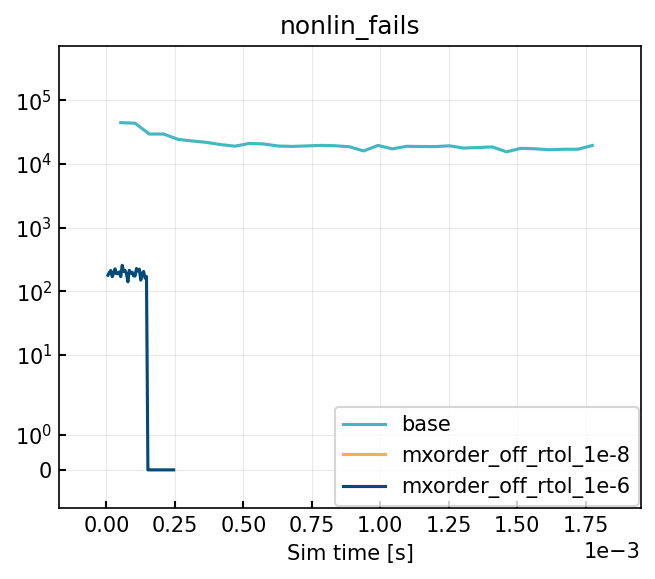

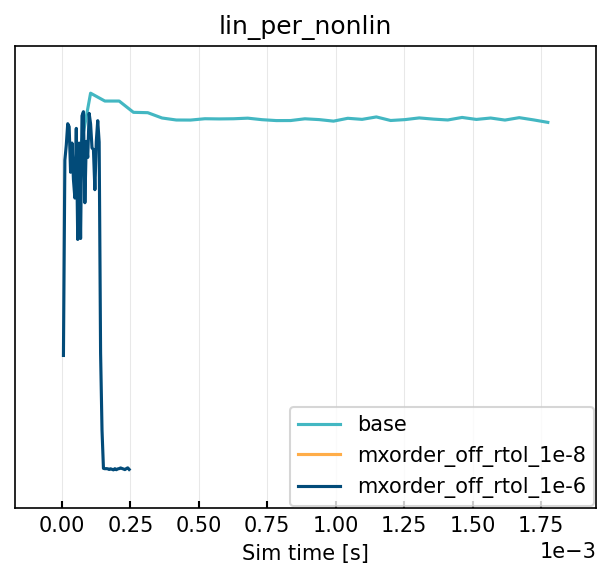

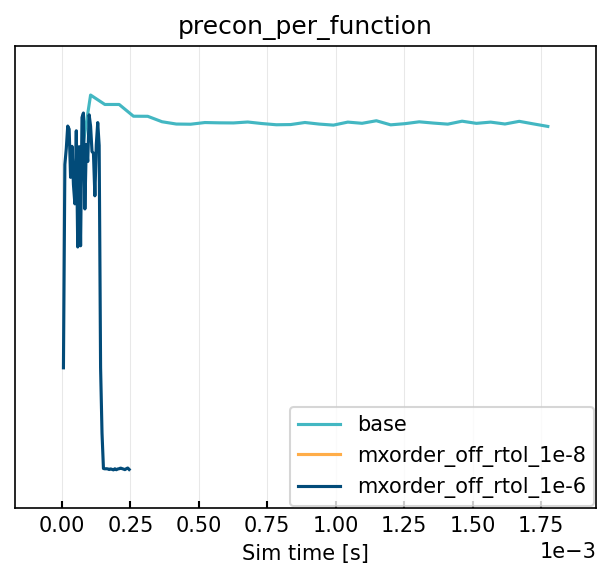

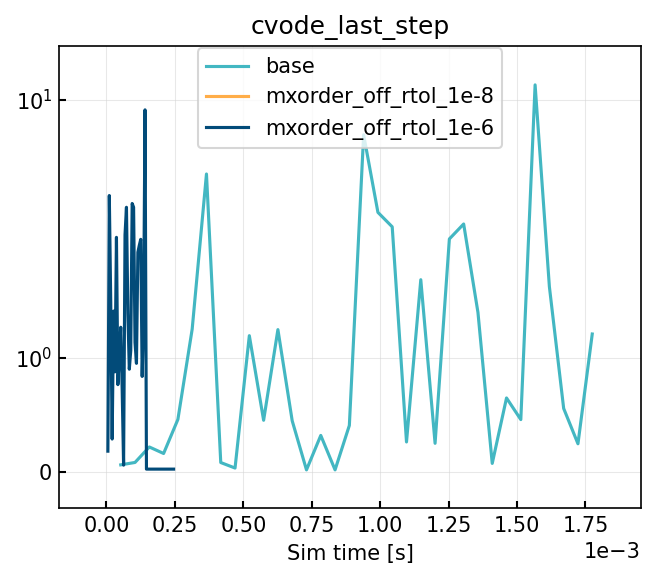

In [7]:
plot_cvode_performance(cs)

In [99]:
cs.keys()

dict_keys(['quicktest_1e-5'])

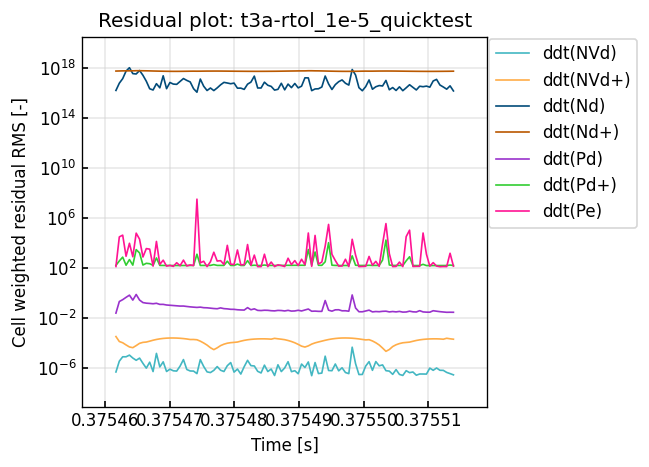

In [103]:
ds = cs["quicktest_1e-5"].ds

plot_ddt(cs["quicktest_1e-5"])

In [29]:
ds.hermesm.get_cvode_metrics()
ds.dims

C:\Users\mikek\OneDrive\Project\python-packages\sdtools\hermes3\accessors.py:9: AccessorRegistrationWarning: registration of accessor <class 'hermes3.accessors.HermesDataArrayAccessor'> under name 'hermesm' for type <class 'xarray.core.dataarray.DataArray'> is overriding a preexisting attribute with the same name.
  class HermesDataArrayAccessor(BoutDataArrayAccessor):
C:\Users\mikek\OneDrive\Project\python-packages\sdtools\hermes3\accessors.py:46: AccessorRegistrationWarning: registration of accessor <class 'hermes3.accessors.HermesDatasetAccessor'> under name 'hermesm' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class HermesDatasetAccessor(BoutDatasetAccessor):


Frozen({'x': 20, 'theta': 58, 't': 48})

In [35]:
[print(x) for x in ds.data_vars if "cvode" in x]

cvode_last_order
cvode_last_step
cvode_nfevals
cvode_nliters
cvode_nniters
cvode_nonlin_fails
cvode_npevals
cvode_nsteps
cvode_num_fails
cvode_stab_lims


[None, None, None, None, None, None, None, None, None, None]

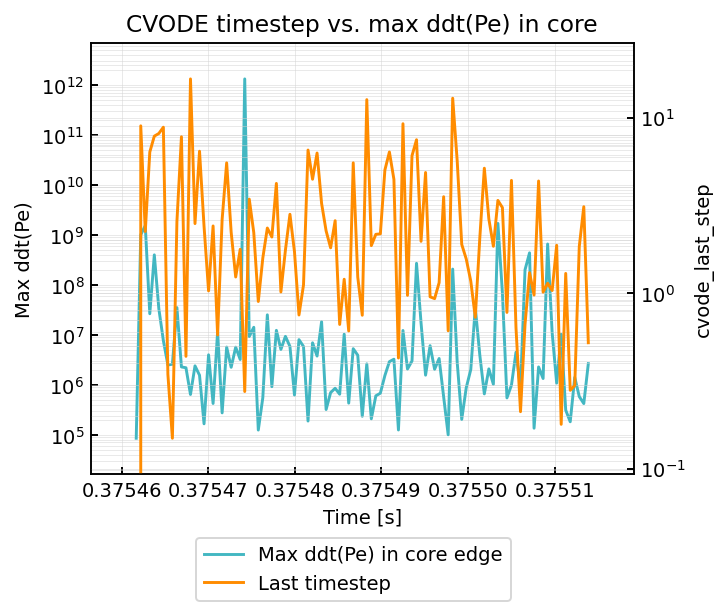

In [104]:
core = ds.hermesm.select_region("core_edge").squeeze()
fig, ax = plt.subplots()
ax.set_yscale("log")
ax2 = ax.twinx()
ax2.set_yscale("log")

# core.dims
core["ddt(Pe)"].max("theta").plot(ax = ax, label = "Max ddt(Pe) in core edge")
ds["cvode_last_step"].plot(ax = ax2, c = "darkorange", label = "Last timestep")

ax.set_title("CVODE timestep vs. max ddt(Pe) in core")
ax2.set_title("")
ax.set_ylabel("Max ddt(Pe)")
# ax2.set_ylabel("CVODE timestep")

fig.legend(loc = "upper center", bbox_to_anchor=(0.5, 0))

Text(0.5, 0, 'Poloidal coordinate')

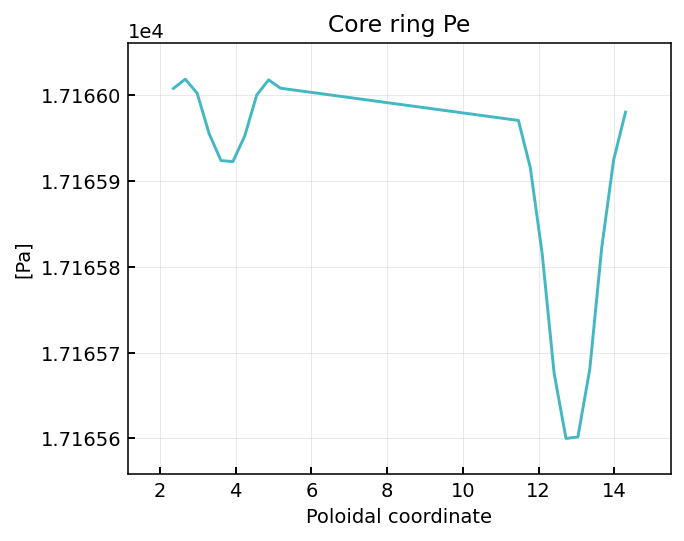

In [92]:
core = ds.hermesm.select_region("core_edge").squeeze()
fig, ax = plt.subplots()
# ax.set_yscale("log")
# ax2 = ax.twinx()
# ax2.set_yscale("log")

# core.dims
core["Pe"].isel(t=-1).sortby("theta").plot(ax = ax)
# core["ddt(Pe)"].max("theta").plot(ax = ax, label = "Max ddt(Pe) in core edge")
# ds["cvode_last_step"].plot(ax = ax2, c = "darkorange", label = "Last timestep")

ax.set_title("Core ring Pe")
ax2.set_title("")
ax.set_ylabel("[Pa]")
ax.set_xlabel("Poloidal coordinate")
# ax2.set_ylabel("CVODE timestep")

# fig.legend(loc = "upper center", bbox_to_anchor=(0.5, 0))

In [97]:
%matplotlib widget

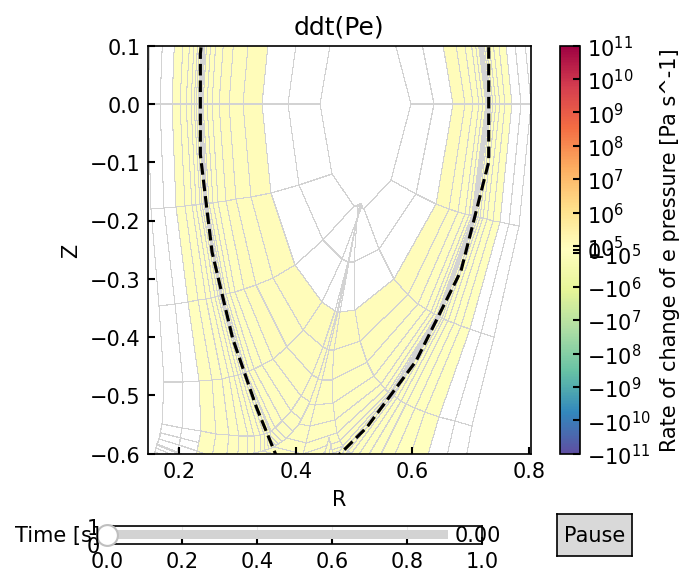

In [98]:
plt.close("all")
fig, ax = plt.subplots(dpi = 150)

anim = xbout.plotting.animate.animate_poloidal(
    ds["ddt(Pe)"].hermesm.clean_guards(), ax = ax, cmap = "Spectral_r",
    targets = False,
    logscale = True,
    vmin = -1e11,
    vmax = 1e11,
    color = "lightgrey",
    lw = 0.01)

ax.set_ylim(-0.6, 0.1)
ax.grid(False)

In [69]:
%matplotlib inline

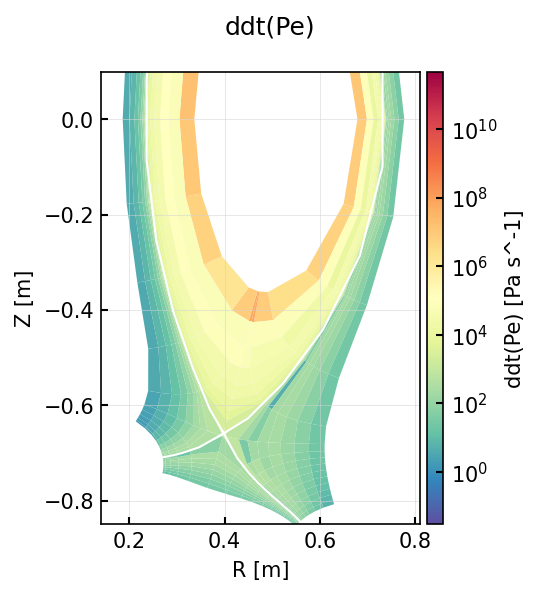

In [71]:
# fig, ax = plt.subplots()


plot2d(
    [
        # dict(data = ds["Nd"]),
        dict(data = abs(ds["ddt(Pe)"]).isel(t=-1), logscale = True, vmin = None, vmax = None),
        ], 
        ylim = (-0.85, 0.1),
        clean_guards = True,
        title = "ddt(Pe)")

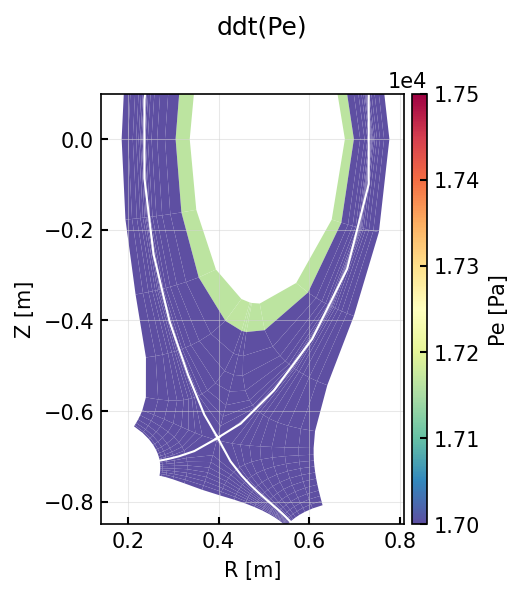

In [87]:
# fig, ax = plt.subplots()


plot2d(
    [
        # dict(data = ds["Nd"]),
        dict(data = abs(ds["Pe"]).isel(t=-1), logscale = True, vmin = 17000, vmax = 17500),
        ], 
        ylim = (-0.85, 0.1),
        clean_guards = True,
        logscale = False,
        title = "ddt(Pe)")
